In [1]:
# Using cluster analysis to segment customers can help to understand the features that
# differentiate customer segments and help the marketing team plan marketing strategies



In [2]:
# First step is to read and preprocess data
import pandas as pd
customer = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/mall_customers.csv')

In [3]:
customer.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# K means makes use of the numerical variables in the data set
# Select numerical columns that are used to perform k-means cluster analysis
# 4th and 5th column of the dataframe. This results in an array
x = customer.iloc[:,[3,4]].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
# Standardize numerical features to make it easy to group the values. Make them have 
# the same max/min
from sklearn.preprocessing import StandardScaler

# Create scaler. StandardScaler is a function that standardizes values
scaler = StandardScaler()

In [8]:
# Apply the scaler. 
customer_std = scaler.fit_transform(x)
customer_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [9]:
# Perform k-means cluster analysis
# Import kmeans library

from sklearn.cluster import KMeans

In [10]:
# utilize elbow method to find the optimal k
# initialize within cluster sum of squared error to estimate optimal k
wcss = []
# run for loop to iterate between various values of k (in this case up to 11)
for i in range(1,11):
    # initiate parameter determines how centroids are determined
    # n_init = number of independent runs
    # max iter = maximum number of iterations for each run
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init=10,random_state = 0)
    # use the identified value for k to fit the scaled/transformed dataset
    kmeans.fit(customer_std)
    # Append resulting within cluster sse to wcss matrix
    wcss.append(kmeans.inertia_)

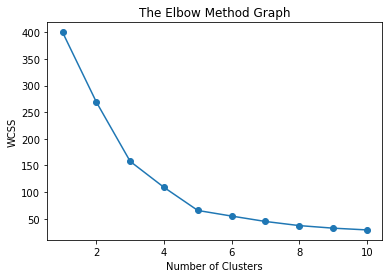

In [13]:
# Visualize the elbow visualization
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, marker = 'o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# From above graph, optimal number of k is 5 (point at which graph begins to decrease in 
# linear fashion)

# Now we can perform k means cluster analysis using 5 clusters
km = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, 
            random_state = 0).fit(customer_std)


In [17]:
# Assign data points to clusters
# fit_predict assigns the datapoints in the data set to each cluster 
clusters = km.fit_predict(customer_std)

# Display clusters array
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [19]:
# Create a new column called 'Label' to save clusters in the dataset
customer['label'] = clusters
customer.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [21]:
# Interpret and visualize the clusters

# create a dataframe to save the centroids for the clusters in terms of Annual Income 
# and Spending Score

# km.cluster_centers -> centroid location. 
# Columns identifies the name of the columns in the dataframe

centroids = pd.DataFrame(km.cluster_centers_,columns = ['Annual Income (k$)', 
                                                        'Spending Score (1-100)'])
centroids
# centroid values will indicate how many standard deviations the original value
# is from the feature's mean value

# From output below: Customers in row 0 have the highest annual income. Custoemrs in row 3 
# have the highest spending score

,Annual Income (k$),Spending Score (1-100)
0,1.055003,-1.284439
1,-0.200913,-0.026456
2,0.991583,1.239503
3,-1.329545,1.132178
4,-1.307519,-1.136965


In [27]:
# Add a new column called 'cluster' to indicate the index of the clusters for each set of 
# the centroids

centroids ['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Annual Income (k$),Spending Score (1-100),Cluster
0,1.055003,-1.284439,Cluster 0
1,-0.200913,-0.026456,Cluster 1
2,0.991583,1.239503,Cluster 2
3,-1.329545,1.132178,Cluster 3
4,-1.307519,-1.136965,Cluster 4


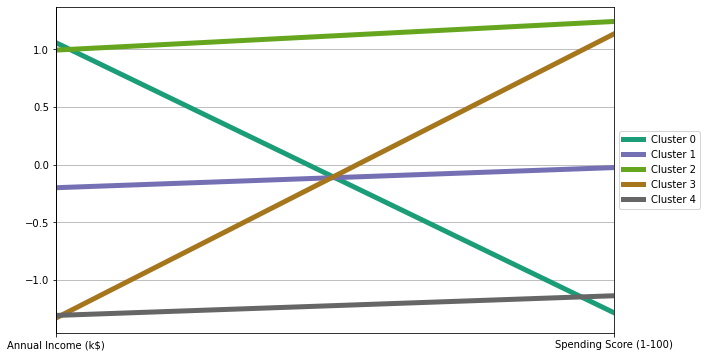

In [30]:
# Create parallel coordinates to visualize the centroids for each cluster

# import library
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# parallel coordinates visusalization. This shows us visually how the clusters are differentiated
# between annual income and spending score
plt.figure(figsize = (10,6))
parallel_coordinates(centroids,class_column = 'Cluster', colormap = 'Dark2', linewidth =5)
plt.legend(loc='center left', bbox_to_anchor = (1,0.5))

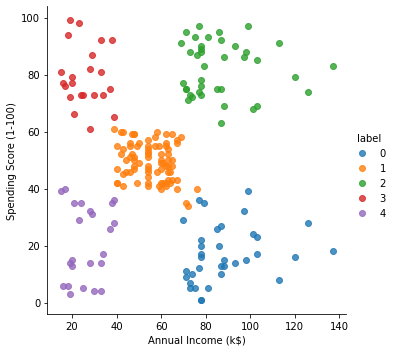

In [32]:
# Visualize the clusters using two variables Annual Income and Spending Score
# Create scatter plot
# fit_reg is false so regression lines are not drawn
import seaborn as sns
sns.lmplot(data = customer, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'label',
          fit_reg = False, legend = True)